In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
training_set=dataset_train.iloc[:,1:2].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [6]:
xtrain=[]
ytrain=[]
for i in range(60,1258):
    xtrain.append((training_set_scaled[i-60:i,0]))
    ytrain.append((training_set_scaled[i,0]))
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)
#print(xtrain.shape[0])
#print((training_set_scaled).shape)
xtrain=np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
print(xtrain)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


In [5]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [6]:
rnn=Sequential()

In [7]:
rnn.add(LSTM(units=50,return_sequences=True,input_shape=(xtrain.shape[1],1)))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units=50,return_sequences=True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units=50,return_sequences=True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units=50,return_sequences=False))
rnn.add(Dropout(0.2))
rnn.add(Dense(units=1))

In [17]:
rnn.compile(optimizer='adam',loss='mean_squared_error')

In [18]:
rnn.fit(xtrain,ytrain,epochs=10,batch_size=32)

Epoch 1/10
38/38 [==============================] - 9s 82ms/step - loss: 0.0019
Epoch 2/10
38/38 [==============================] - 3s 81ms/step - loss: 0.0016
Epoch 3/10
38/38 [==============================] - 3s 85ms/step - loss: 0.0013
Epoch 4/10
38/38 [==============================] - 3s 87ms/step - loss: 0.0014
Epoch 5/10
38/38 [==============================] - 3s 81ms/step - loss: 0.0014
Epoch 6/10
38/38 [==============================] - 3s 81ms/step - loss: 0.0020
Epoch 7/10
38/38 [==============================] - 3s 81ms/step - loss: 0.0018
Epoch 8/10
38/38 [==============================] - 3s 81ms/step - loss: 0.0013
Epoch 9/10
38/38 [==============================] - 3s 82ms/step - loss: 0.0014
Epoch 10/10
38/38 [==============================] - 3s 82ms/step - loss: 0.0014


In [19]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values
#print(testing_set.shape)

In [20]:
datasettotal=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=datasettotal[len(datasettotal)-len(dataset_test) - 60:].values
inputs=inputs.reshape(-1,1)
#print(inputs.shape)
inputs=sc.transform(inputs)
xtest=[]
ytest=[]
for i in range(60,80):
    xtest.append(inputs[i-60:i,0])
xtest=np.array(xtest)

In [21]:
#print(ytest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
#print(xtest.shape)
predicted_stock_price=rnn.predict(xtest)
#print(predicted_stock_price.shape)
#print(predicted_stock_price)
#a,b,c=predicted_stock_price.shape
#predicted_stock_price=np.reshape(predicted_stock_price,(a,b))
#print(predicted_stock_price.shape)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

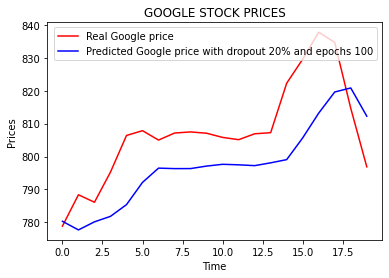

In [22]:
plt.plot(real_stock_price,color="red",label="Real Google price")
plt.plot(predicted_stock_price,color="blue",label="Predicted Google price with dropout 20% and epochs 100")
plt.title("GOOGLE STOCK PRICES")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Prices")
plt.show()

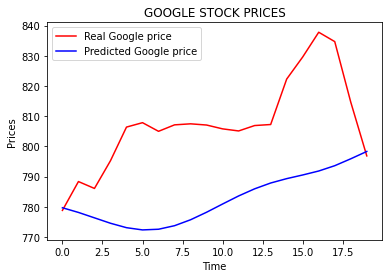

In [35]:
plt.plot(real_stock_price,color="red",label="Real Google price")
plt.plot(predicted_stock_price,color="blue",label="Predicted Google price with dropout 30% and Epochs 30")
plt.title("GOOGLE STOCK PRICES")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Prices")
plt.show()